# Azure ML 설정 (Configuration)

아래 코드는 jupyter notebook을 실행 할 때 발생하는 경고를 무시합니다.

In [ ]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

Azure Notebook에서 Azure ML을 사용하기 위해서는 Azure ML SDK를 불러와야 하며 Azure ML Workspace와의 연동이 필수입니다. Azure ML Workspace와 관련된 내용은 Azure Portal에서 쉽게 확인할 수 있습니다.

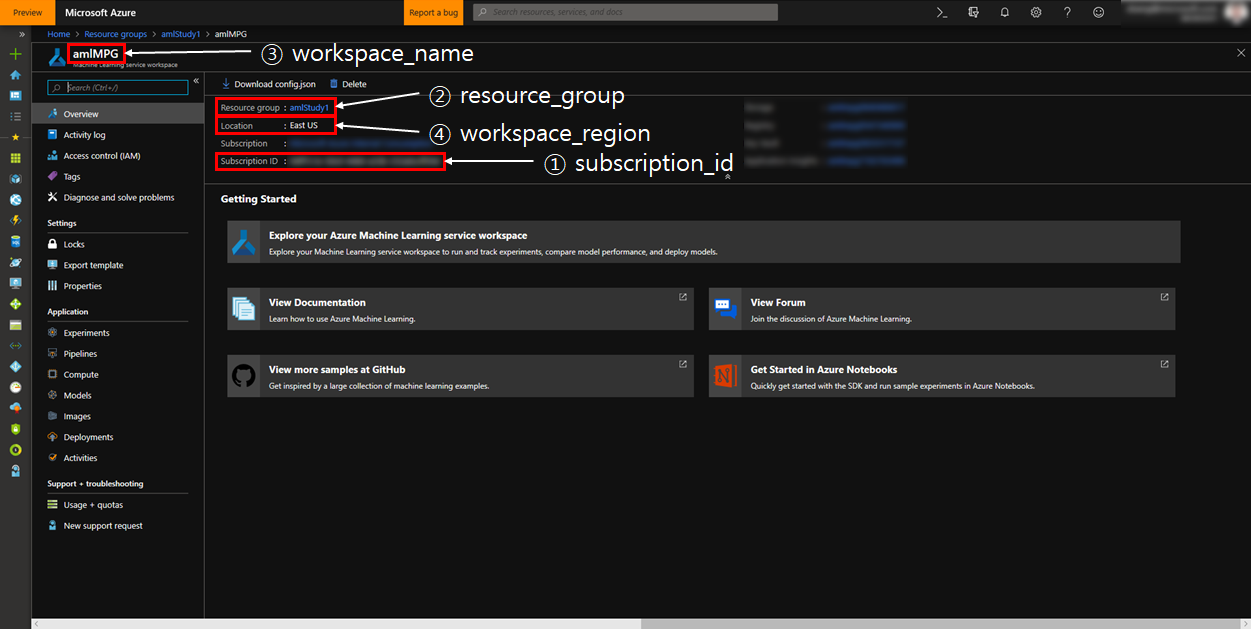

In [ ]:
import azureml.core
from azureml.core import Workspace
print("Azure ML SDK Version: ", azureml.core.VERSION)

subscription_id = '94ff7c1e-50c0-4466-a33b-232a0ccff39d'
resource_group = 'ml-service-demos'
workspace_name = 'Demo-Roy'
workspace_region = 'eastus'

ws = Workspace(subscription_id = subscription_id, resource_group = resource_group, workspace_name = workspace_name)
print("Workspace Name: ", ws.name, "\nResouce Group: ", ws.resource_group, "\nRegion: ", ws.location)

ws.write_config()

# 실험 생성

머신러닝을 사용하기 전 실험을 만들어야 하며 아래 코드의 경우 'sklearn-mpg'라고 정의하였습니다. 생성된 실험은 Azure Portal에서도 확인할 수 있습니다.

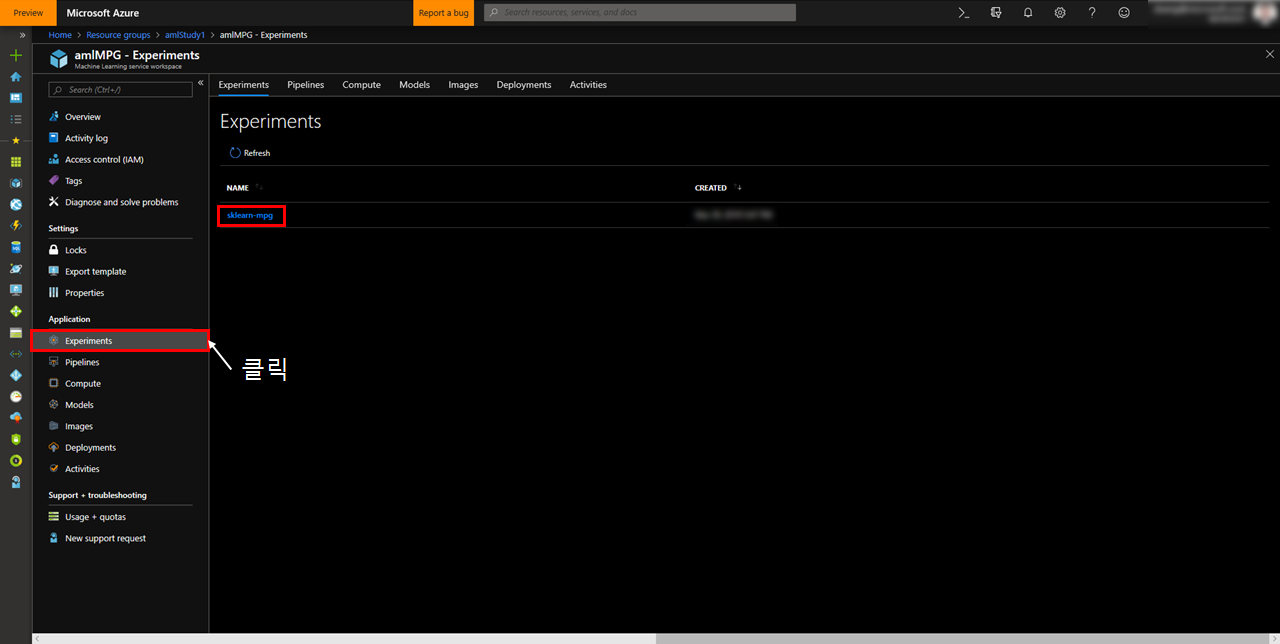

In [ ]:
experiment_name = 'sklearn-mpg'

from azureml.core import Experiment
exp = Experiment(workspace = ws, name = experiment_name)

# Compute 생성

Azure에서는 머신러닝 중 학습을 위해 여러가지 Compute Target을 지원합니다. 
    1. 로컬 컴퓨터 자원
    2. AML Compute (Batch AI)
    3. Remote VM (일반 또는 DSVM)
    4. Azure Databricks
    5. HD Insight
    6. 기타 (On-prem Server, 외부 VM 등)

실험과 마찬가지로 Azure ML 서비스에서 만들어진 compute resource는 Azure Portal에서 확인할 수 있습니다.

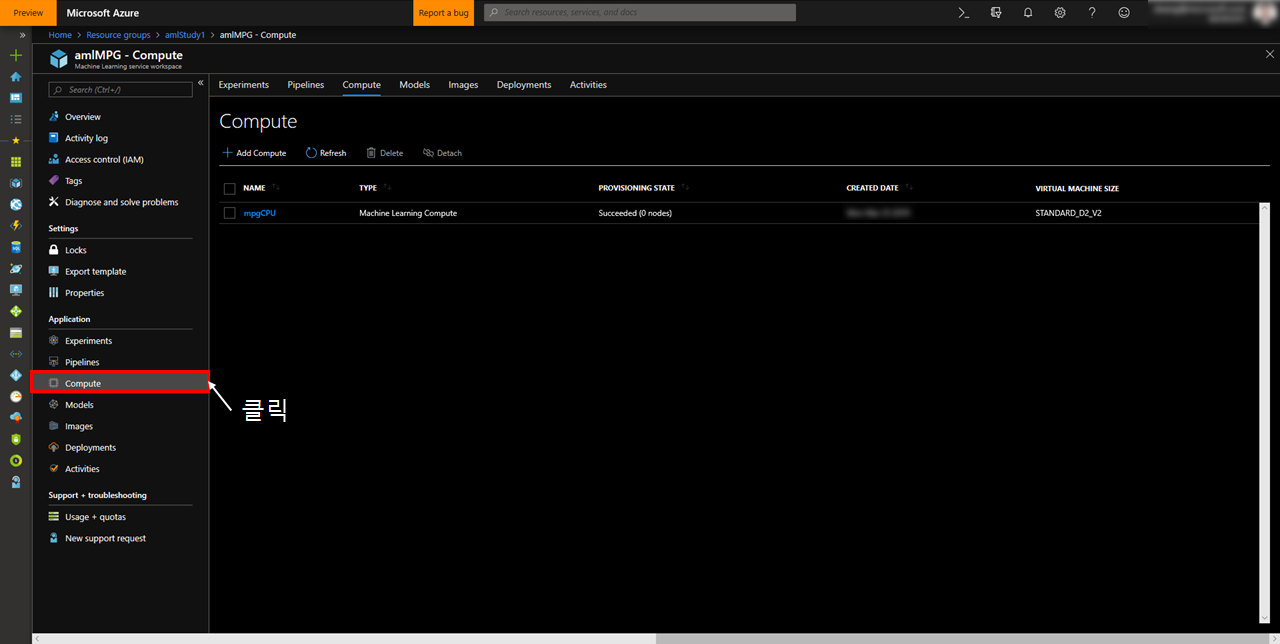

## Azure Machine Learning Compute (AmlCompute)

아래의 코드는 Azure에서 머신러닝을 수행하기 위해 AmlCompute를 attach하는 작업입니다. 만약 이미 이름이 존재하는 클러스터는 자동으로 attach되며 존재하지 않는 경우 새로 생성하게 됩니다.

In [ ]:
from azureml.core.compute import AmlCompute, ComputeTarget
import os

compute_name = os.environ.get("AML_COMPUTE_CLUSTER_NAME", "CPUcluster")
compute_min_nodes = os.environ.get("AML_COMPUTE_CLUSTER_MIN_NODES", 0)
compute_max_nodes = os.environ.get("AML_COMPUTE_CLUSTER_MAX_NODES", 4)
vm_size = os.environ.get("AML_COMPUTE_CLUSTER_SKU", "STANDARD_D2_V2")

if compute_name in ws.compute_targets:
    compute_target = ws.compute_targets[compute_name]
    if compute_target and type(compute_target) is AmlCompute:
        print('Found a compute target!', compute_name, 'has been attached.')
else:
    print('Creating a new compute target...')
    provisioning_config = AmlCompute.provisioning_configuration(vm_size = vm_size, 
                                                                min_nodes = compute_min_nodes, 
                                                                max_nodes = compute_max_nodes)
    compute_target = ComputeTarget.create(ws, compute_name, provisioning_config)
    print('Created a compute target!', compute_name, 'has been attached.')